<a href="https://colab.research.google.com/github/Pawan12345kr/Cancer-detection-DL/blob/main/Chest_CT_scan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###*Name* :- **PAWAN KUMAR**
###*University Regn no.:* :- **21030460036**
###*Branch* :- **Electronics and Communication Engineering**

**PROJECT** on **DEEP LEARNING**

For Documentation:- [Click here](https://docs.google.com/document/d/1_lc7cuqPlhWVdOb_dmtLIU9oOhONeAaeSl8iUadyHVc/edit?usp=sharing)

### **IMPORT LIBRARIES**

In [ ]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout,Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image

###**MOUNTING GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**UNZIP FOLDERS**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Machine-learning-dataset/Chest-CT-scan.zip","r")
zip_ref.extractall()
zip_ref.close()


###**VIEW CONTENTS INSIDE THE FOLDERS**

In [ ]:
!ls /content/Data/train

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
normal
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [ ]:
!ls /content/Data/valid

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
normal
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [ ]:
!ls /content/Data/test

adenocarcinoma	large.cell.carcinoma  normal  squamous.cell.carcinoma


In [ ]:
for dirpath, dirnames,filenames in os.walk("/content/Data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/Data'.
there are 4 directories and 0 images in '/content/Data/test'.
there are 0 directories and 90 images in '/content/Data/test/squamous.cell.carcinoma'.
there are 0 directories and 120 images in '/content/Data/test/adenocarcinoma'.
there are 0 directories and 51 images in '/content/Data/test/large.cell.carcinoma'.
there are 0 directories and 54 images in '/content/Data/test/normal'.
there are 4 directories and 0 images in '/content/Data/train'.
there are 0 directories and 155 images in '/content/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'.
there are 0 directories and 195 images in '/content/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'.
there are 0 directories and 148 images in '/content/Data/train/normal'.
there are 0 directories and 115 images in '/content/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'.
there are 4 directories and 0 images in '/content/Data/valid'.
there are 0 directories and 15

Chest scanned images have been classified into four categories, namely:- **adenocarcinoma**, **large.cell.carcinoma**, **normal** and **squamous.cell.carcinoma** in all train, validation and test set.

In [ ]:
# Number of images of each type in training set
types = ["adenocarcinoma","large.cell.carcinoma","normal","squamous"]

print("In training set there are:\n")

print(f"{len(os.listdir('/content/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'))} images of {types[0]}\n")
print(f"{len(os.listdir('/content/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'))} images of {types[1]}\n")
print(f"{len(os.listdir('/content/Data/train/normal'))} images of {types[2]}\n")
print(f"{len(os.listdir('/content/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'))} image of {types[3]}")

In training set there are:

195 images of adenocarcinoma

115 images of large.cell.carcinoma

148 images of normal

155 image of squamous


In [ ]:
# Number of images of each type in validation set set
print("In validation set there are:\n")
print(f"{len(os.listdir('/content/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'))} images of {types[0]}\n")
print(f"{len(os.listdir('/content/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'))} images of {types[1]}\n")
print(f"{len(os.listdir('/content/Data/train/normal'))} images of {types[2]}\n")
print(f"{len(os.listdir('/content/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'))} images of {types[3]}")

In validation set there are:

23 images of adenocarcinoma

21 images of large.cell.carcinoma

148 images of normal

15 images of squamous


###**IMAGE LABELS**

In [ ]:
# Actual label of each category in the training set
data_dir_train = pathlib.Path("/content/Data/train")
class_names_train = np.array(sorted([item.name for item in data_dir_train.glob('*')]))
print(class_names_train)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' 'normal'
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [ ]:
# Actual label of each category in the validation set
data_dir_valid = pathlib.Path("/content/Data/valid")
class_names_valid = np.array(sorted([item.name for item in data_dir_valid.glob('*')]))
print(class_names_valid)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' 'normal'
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [ ]:
# Actual label of each category in the test set
data_dir_test = pathlib.Path("/content/Data/test")
class_names = np.array(sorted([item.name for item in data_dir_test.glob('*')]))
print(class_names)

['adenocarcinoma' 'large.cell.carcinoma' 'normal'
 'squamous.cell.carcinoma']


###**IMAGE VISUALIZATION**

Here, we want to see how actually images in training looks like?

In [ ]:
# making function to view images
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (267, 418, 4)


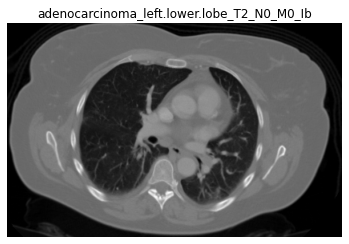

In [ ]:
img_adenocarcinoma = view_random_image(target_dir = "/content/Data/train/",
                        target_class = "adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib")


Image shape: (425, 453, 4)


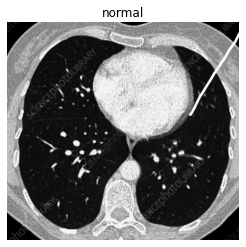

In [ ]:
img_normal = view_random_image(target_dir = "/content/Data/train/",
                        target_class = "normal")

Image shape: (281, 369, 4)


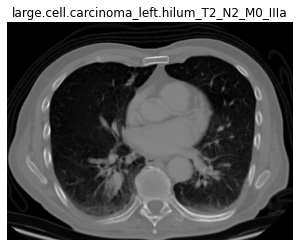

In [ ]:
img_large_cell_carcinoma = view_random_image(target_dir = "/content/Data/train/",
                        target_class = "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa")

Image shape: (309, 428, 4)


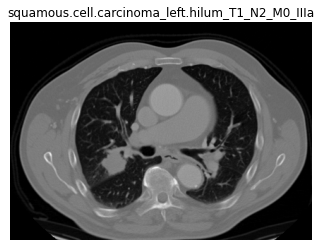

In [ ]:
img_squamous = view_random_image(target_dir = "/content/Data/train/",
                        target_class = "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa")

### **TRANSFORMING IMAGES INTO NUMBERS**

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
# Transforming training data into numbers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale= 1./255)

train_dir = "/content/Data/train/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 16,
                                               target_size = (240,240),
                                               class_mode = "categorical")
print(len(train_data))

Found 613 images belonging to 4 classes.
39


In [ ]:
# Transforming validation data into numbers

tf.random.set_seed(42)

valid_datagen = ImageDataGenerator(rescale= 1./255)

valid_dir = "/content/Data/valid/"

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size = 16,
                                               target_size = (240,240),
                                               class_mode = "categorical")

Found 72 images belonging to 4 classes.


In [ ]:
# Transforming test data into numbers

tf.random.set_seed(42)

test_datagen = ImageDataGenerator(rescale= 1./255)

test_dir = "/content/Data/test"

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size = 16,
                                               target_size = (240,240),
                                               class_mode = "categorical")

Found 315 images belonging to 4 classes.


###**MODEL BUILDING (WITHOUT AUGMENTATION)**

In [ ]:
# Model_1 (without data augmentation)

tf.random.set_seed(42)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (240,240,3)),
    tf.keras.layers.Conv2D(32,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(32,3,activation = "relu"),
    tf.keras.layers.Conv2D(32,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "softmax")
])


In [ ]:
# compiling model_1
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                      epochs = 20,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/20
39/39 [==============================] - 14s 146ms/step - loss: 1.0779 - accuracy: 0.4812 - val_loss: 0.9429 - val_accuracy: 0.5139
Epoch 2/20
39/39 [==============================] - 4s 95ms/step - loss: 0.6545 - accuracy: 0.7096 - val_loss: 0.8123 - val_accuracy: 0.6250
Epoch 3/20
39/39 [==============================] - 4s 94ms/step - loss: 0.3600 - accuracy: 0.8744 - val_loss: 0.8465 - val_accuracy: 0.7222
Epoch 4/20
39/39 [==============================] - 5s 127ms/step - loss: 0.1131 - accuracy: 0.9560 - val_loss: 1.1300 - val_accuracy: 0.6944
Epoch 5/20
39/39 [==============================] - 4s 96ms/step - loss: 0.1301 - accuracy: 0.9592 - val_loss: 1.2007 - val_accuracy: 0.5972
Epoch 6/20
39/39 [==============================] - 4s 94ms/step - loss: 0.0798 - accuracy: 0.9723 - val_loss: 1.1243 - val_accuracy: 0.7500
Epoch 7/20
39/39 [==============================] - 5s 129ms/step - loss: 0.0535 - accuracy: 0.9886 - val_loss: 1.6604 - val_accuracy: 0.6528
Epoch 8/2

In [ ]:
# Function to visualize loss and accuracy curves

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

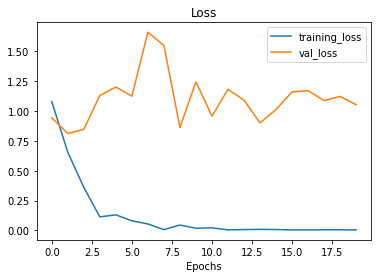

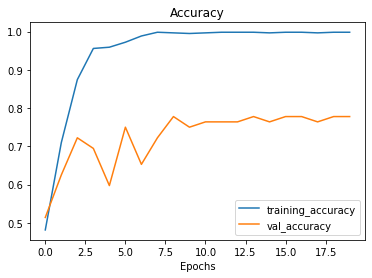

In [ ]:
# Plotting loss and accuracy curves for model_1
plot_loss_curves(history_1)

In [ ]:
model_1_accuracy = model_1.evaluate_generator(generator = test_data)[1]
print(f"The model accuracy is = {model_1_accuracy*100}%")

<ipython-input-45-f0423b16cd26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model_1_accuracy = model_1.evaluate_generator(generator = test_data)[1]


The model accuracy is = 49.841269850730896%


Here, we got the accuracy of model_1 as 49.841269850730896%, **Not good for Medical Use**

###**BUILDING MODELS WITH DATA AUGMENTATION**

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=5, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True, # flip the image on the horizontal axis
                                             vertical_flip = True,
                                             fill_mode = 'nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
print("Augmented training images:")
train_dir = "/content/Data/train/"
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(240, 240),
                                                                   batch_size=16,
                                                                   class_mode='categorical')
# Create ImageDataGenerator valid instance without data augmentation                                                                  #  shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle
valid_dir = "/content/Data/valid/"
valid_data = valid_datagen.flow_from_directory(directory = valid_dir,
                                               target_size = (240,240),
                                               class_mode = "categorical",
                                               batch_size = 16)
# Create ImageDataGenerator test instance without data augmentation
test_dir = "/content/Data/test"
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (240,240),
                                             class_mode = "categorical",
                                             batch_size = 16)

Augmented training images:
Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
# Creating model_2 on augmented training data
tf.random.set_seed(42)
model_2 = tf.keras.applications.VGG16(input_shape = (240,240,3),
                                      include_top = False,
                                      weights = "imagenet")

for layer in model_2.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
x = model_2.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dense(1028, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_2 = Model(inputs = model_2.input, outputs = x)

In [ ]:
# Compiling model_2
model_2.compile(optimizer = optimizers.Adam(learning_rate = 0.002),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [ ]:
# Fitting model_2
history_2 = model_2.fit(train_data_augmented,
                        validation_data = valid_data,
                        epochs = 50,
                        verbose = 1)

Epoch 1/50
39/39 [==============================] - 12s 307ms/step - loss: 0.2950 - accuracy: 0.8874 - val_loss: 1.1537 - val_accuracy: 0.7500
Epoch 2/50
39/39 [==============================] - 12s 303ms/step - loss: 0.4013 - accuracy: 0.8336 - val_loss: 1.0207 - val_accuracy: 0.7917
Epoch 3/50
39/39 [==============================] - 12s 311ms/step - loss: 0.4112 - accuracy: 0.8385 - val_loss: 1.0717 - val_accuracy: 0.6806
Epoch 4/50
39/39 [==============================] - 12s 308ms/step - loss: 0.3878 - accuracy: 0.8467 - val_loss: 0.8704 - val_accuracy: 0.7639
Epoch 5/50
39/39 [==============================] - 12s 303ms/step - loss: 0.3639 - accuracy: 0.8532 - val_loss: 1.2285 - val_accuracy: 0.7639
Epoch 6/50
39/39 [==============================] - 11s 279ms/step - loss: 0.3705 - accuracy: 0.8532 - val_loss: 1.2641 - val_accuracy: 0.8056
Epoch 7/50
39/39 [==============================] - 11s 285ms/step - loss: 0.4027 - accuracy: 0.8287 - val_loss: 1.0733 - val_accuracy: 0.7639

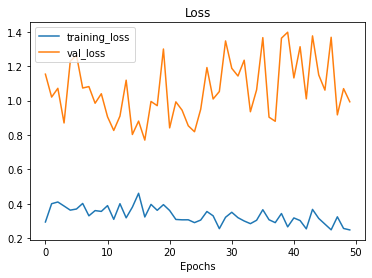

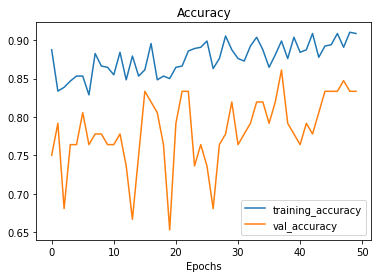

In [ ]:
# Plotting loss and accuracy curves for model_2
plot_loss_curves(history_2)

In [ ]:
model_2_accuracy = model_2.evaluate_generator(generator = test_data)[1]
print(f"The accuracy of the model is = {model_2_accuracy*100}%")

<ipython-input-44-19c3620f80df>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model_2_accuracy = model_2.evaluate_generator(generator = test_data)[1]


The accuracy of the model is = 76.50793790817261%


Here, We achieved model_2 accuracy as 76.50793790817261%, **Efficient for Medical Use**

###**MODEL 3**

In [ ]:
# Creating model_3 on augmented training data
model_3 = Sequential([
  Conv2D(512, 3, activation='relu', input_shape=(240, 240, 3)),
  tf.keras.layers.AvgPool2D(pool_size=2), # reduce number of features by half
  Conv2D(512, 3, activation='relu'),
  tf.keras.layers.AvgPool2D(),
  Conv2D(512, 3, activation='relu'),
  tf.keras.layers.AvgPool2D(),
  Flatten(),
  Dense(4, activation='softmax')
])
# Compile the model
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=25,
                        validation_data=valid_data)

Epoch 1/25
39/39 [==============================] - 33s 627ms/step - loss: 1.5195 - accuracy: 0.3556 - val_loss: 1.9406 - val_accuracy: 0.1806
Epoch 2/25
39/39 [==============================] - 19s 477ms/step - loss: 1.2200 - accuracy: 0.4062 - val_loss: 1.0492 - val_accuracy: 0.4861
Epoch 3/25
39/39 [==============================] - 20s 520ms/step - loss: 1.1029 - accuracy: 0.4600 - val_loss: 1.6053 - val_accuracy: 0.2222
Epoch 4/25
39/39 [==============================] - 19s 490ms/step - loss: 1.0692 - accuracy: 0.5057 - val_loss: 1.1139 - val_accuracy: 0.5139
Epoch 5/25
39/39 [==============================] - 19s 483ms/step - loss: 1.0445 - accuracy: 0.4927 - val_loss: 1.1254 - val_accuracy: 0.5139
Epoch 6/25
39/39 [==============================] - 19s 484ms/step - loss: 1.0088 - accuracy: 0.5122 - val_loss: 0.9968 - val_accuracy: 0.5000
Epoch 7/25
39/39 [==============================] - 19s 487ms/step - loss: 0.9779 - accuracy: 0.5465 - val_loss: 1.0353 - val_accuracy: 0.5417

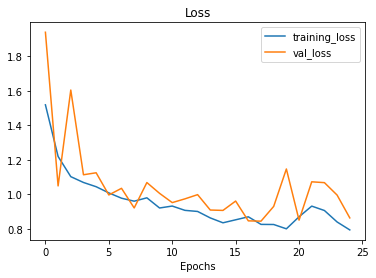

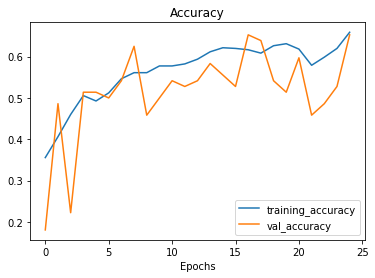

In [ ]:
# Plotting loss and accuracy curves for model_3
plot_loss_curves(history_3)

In [ ]:
model_3_accuracy = model_3.evaluate_generator(generator = test_data)[1]
print(f"Model_3 has an accuracy of: {model_3_accuracy*100}%")

<ipython-input-80-d7c9cc3c2d0a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model_3_accuracy = model_3.evaluate_generator(generator = test_data)[1]


Model_3 has an accuracy of: 57.46031999588013%


Here, We achieved model_3 accuracy as 57.46031999588013%. It seems to **guess** the result only. **Not good for medical use**

###**COMPARISON BETWEEN ALL MODELS**

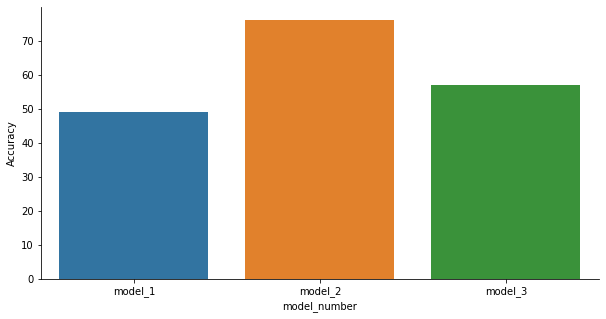

In [ ]:
models = ["model_1","model_2", "model_3"]
accuracy = [model_1_accuracy,model_2_accuracy,model_3_accuracy]

accuracy = np.floor([i*100 for i in accuracy])

fig = plt.figure(figsize = (10,5))

#creating bar plot
sns.barplot(x = models,
            y = accuracy)
plt.xlabel("model_number")
plt.ylabel("Accuracy")
sns.despine()
plt.show();

###**VISUALIZING INDICES**

In [ ]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
valid_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

###**TRANSFORMING AND PREDICTING IMAGES**

In [ ]:
def chestScanPrediction(path, _model):
  classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]

  # Loading image
  img = image.load_img(path,target_size = (240,240))

  # Normalizing Image
  norm_img = image.img_to_array(img)/255

  # Converting Image to Numpy Array
  input_arr_img = np.array([norm_img])

  # Getting Prediction
  pred = np.argmax(_model.predict(input_arr_img))

  # Printing Model Prediction
  print(classes_dir[pred])

In [ ]:
path = "/content/Data/test/normal/11.png"
chestScanPrediction(path, model_2)

1/1 [==============================] - 0s 18ms/step
Normal


###**Hurrah! The prediction is RIGHT**